# **Arbitary Value Imputer**
An Arbitrary Value Imputer replaces missing values **(NaNs)** with a specific, user-defined arbitrary value **(any random value)**. This value is typically chosen to be outside the normal distribution of the variable, ensuring that the imputed values are easily identifiable and do not blend in with the existing data. This method can be useful when missingness is not at random and the arbitrary value can act as a flag for the missing data.

#### **Advantages:**
*   **Simple to implement:** Easy to understand and apply.
*   **Captures missingness information:** If the arbitrary value is chosen carefully (e.g., a value outside the normal range), it can act as a flag for observations with missing data, allowing models to potentially learn from the missingness pattern.
*   **Suitable for categorical variables:** Can be used to create a new category for missing values.

#### **Disadvantages:**
*   **Distorts the original PDF distribution:** Replacing NaNs with an arbitrary value can significantly alter the mean, variance, and overall distribution of the variable, especially if a large proportion of data is missing.
*   **Introduces artificial outliers:** If the arbitrary value is extreme, it can create an artificial outlier that might mislead some machine learning models.
*   **May lead to incorrect relationships:** Can distort correlations between variables if the arbitrary value is not chosen appropriately.
*   **Model bias:** Models might interpret the arbitrary value as a real data point with specific meaning, leading to biased predictions.
*   **Requires careful selection of the arbitrary value:** Choosing an appropriate arbitrary value can be subjective and critical to the imputation's success.



In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [198]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
df['family'] = df['SibSp']+df['Parch']
df = df.drop(columns=['SibSp','Parch'])
df = df[['Age', 'Fare', 'family', 'Survived']]
df.head()


,Age,Fare,family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [200]:
print(df.isna().sum(), '\n')
print(df.isna().mean()*100)     # 19 % data missing in Age

Age         177
Fare          0
family        0
Survived      0
dtype: int64 

Age         19.86532
Fare         0.00000
family       0.00000
Survived     0.00000
dtype: float64


## **Using Pandas**

In [201]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"\nNull values in x_train: \n{x_train.isna().mean()*100}")

x_train['age_50'] = x_train['Age'].fillna(50)       # here i am putting random values for missing datas in age feature
x_train['age_25'] = x_train['Age'].fillna(25)       # here i am putting random values for missing datas in age feature

x_train.sample(5)




Null values in x_train: 
Age       19.662921
Fare       0.000000
family     0.000000
dtype: float64


,Age,Fare,family,age_50,age_25
17,NaN,13.0000,0,50.0,25.0
770,24.0,9.5000,0,24.0,24.0
836,21.0,8.6625,0,21.0,21.0
637,31.0,26.2500,2,31.0,31.0
324,NaN,69.5500,10,50.0,25.0


In [202]:
df.isna().sum()

Age         177
Fare          0
family        0
Survived      0
dtype: int64

In [203]:
x_train.var()

Age        210.251707
Fare      2700.831981
family       2.830892
age_50     235.338068
age_25     172.053605
dtype: float64

In [204]:
x_train.cov()

,Age,Fare,family,age_50,age_25
Age,210.251707,71.580633,-6.993325,210.251707,210.251707
Fare,71.580633,2700.831981,18.495747,5.839050,68.819583
family,-6.993325,18.495747,2.830892,-6.007344,-5.530487
age_50,210.251707,5.839050,-6.007344,235.338068,154.261980
age_25,210.251707,68.819583,-5.530487,154.261980,172.053605


In [205]:
x_train.corr()

,Age,Fare,family,age_50,age_25
Age,1.000000,0.088103,-0.319651,1.000000,1.000000
Fare,0.088103,1.000000,0.211525,0.007324,0.100956
family,-0.319651,0.211525,1.000000,-0.232742,-0.250594
age_50,1.000000,0.007324,-0.232742,1.000000,0.766621
age_25,1.000000,0.100956,-0.250594,0.766621,1.000000


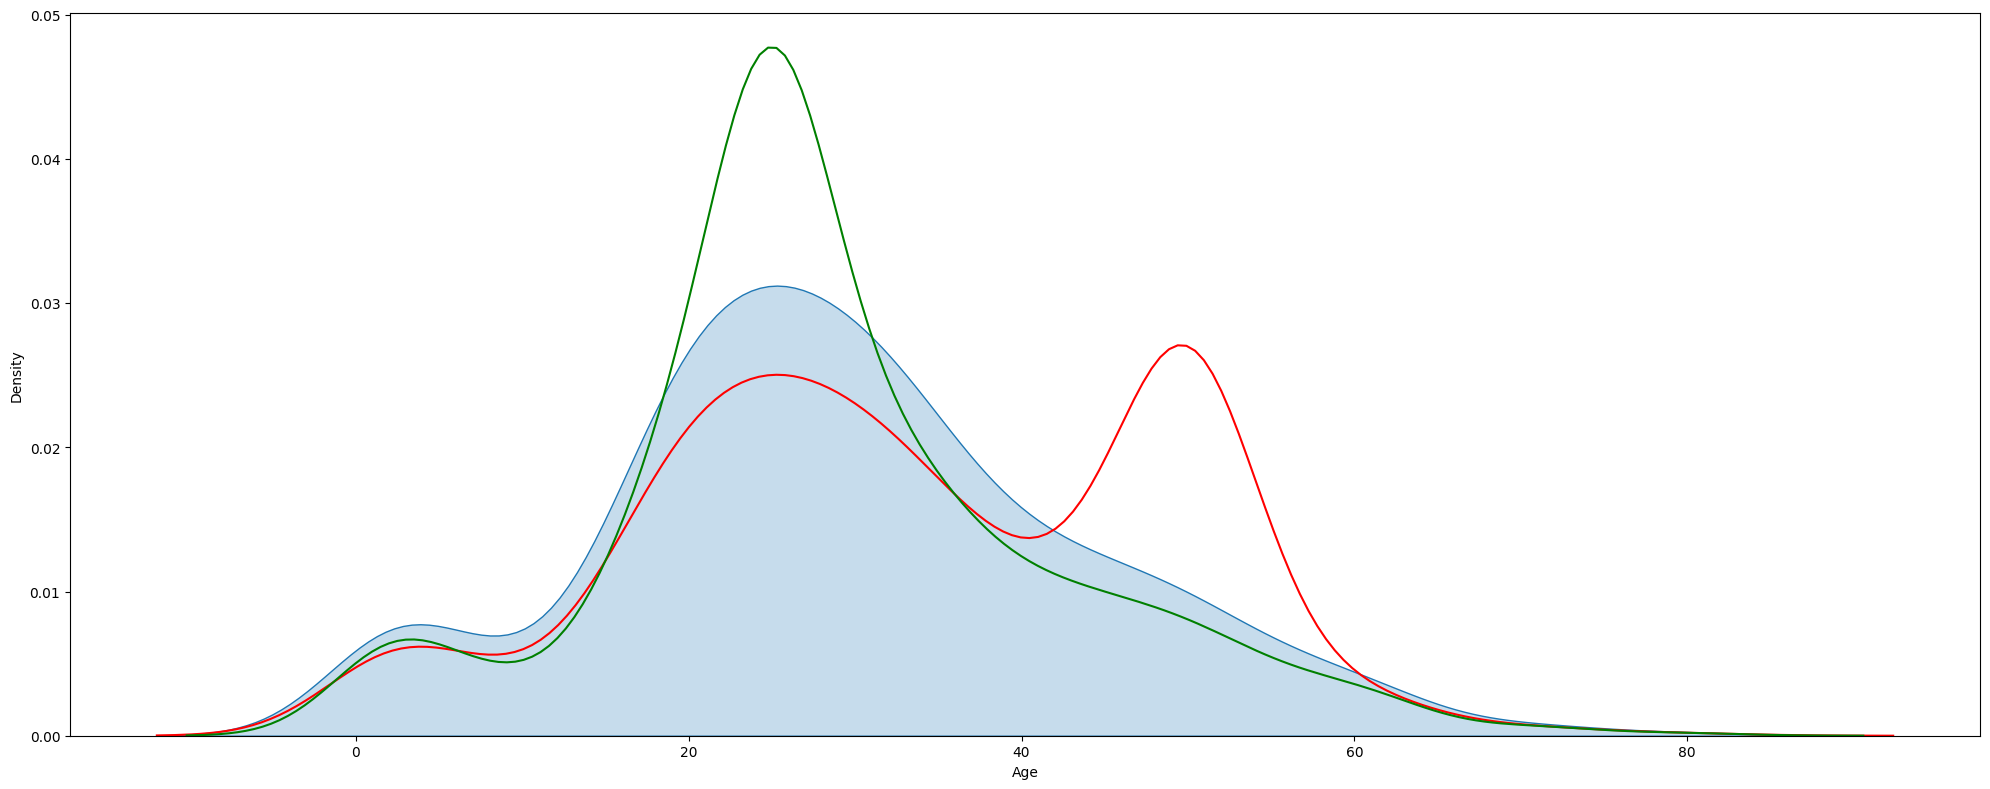

In [206]:
plt.figure(figsize=(20,8))


sns.kdeplot(x_train['Age'], fill=True)
sns.kdeplot(x_train['age_50'], color='r')
sns.kdeplot(x_train['age_25'], color='g')

plt.tight_layout()
plt.show()


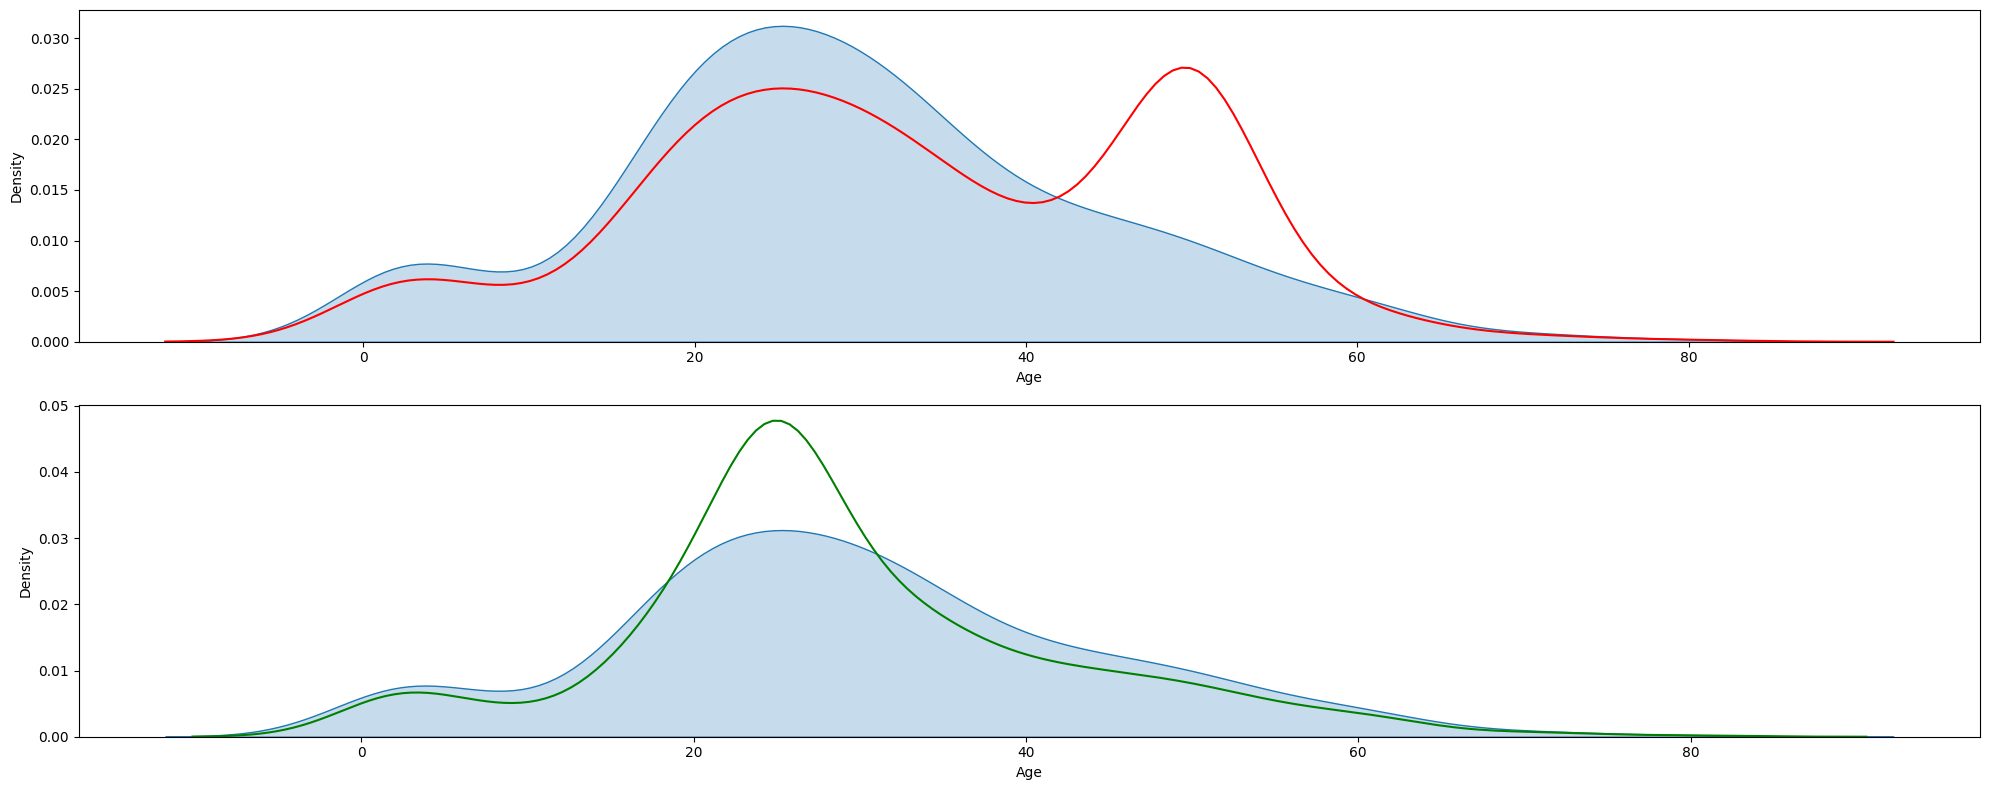

In [207]:
plt.figure(figsize=(20,8))

plt.subplot(211)
sns.kdeplot(x_train['Age'], fill=True)
sns.kdeplot(x_train['age_50'], color='r')

plt.subplot(212) 
sns.kdeplot(x_train['Age'], fill=True)
sns.kdeplot(x_train['age_25'], color='g')

plt.tight_layout()
plt.show()


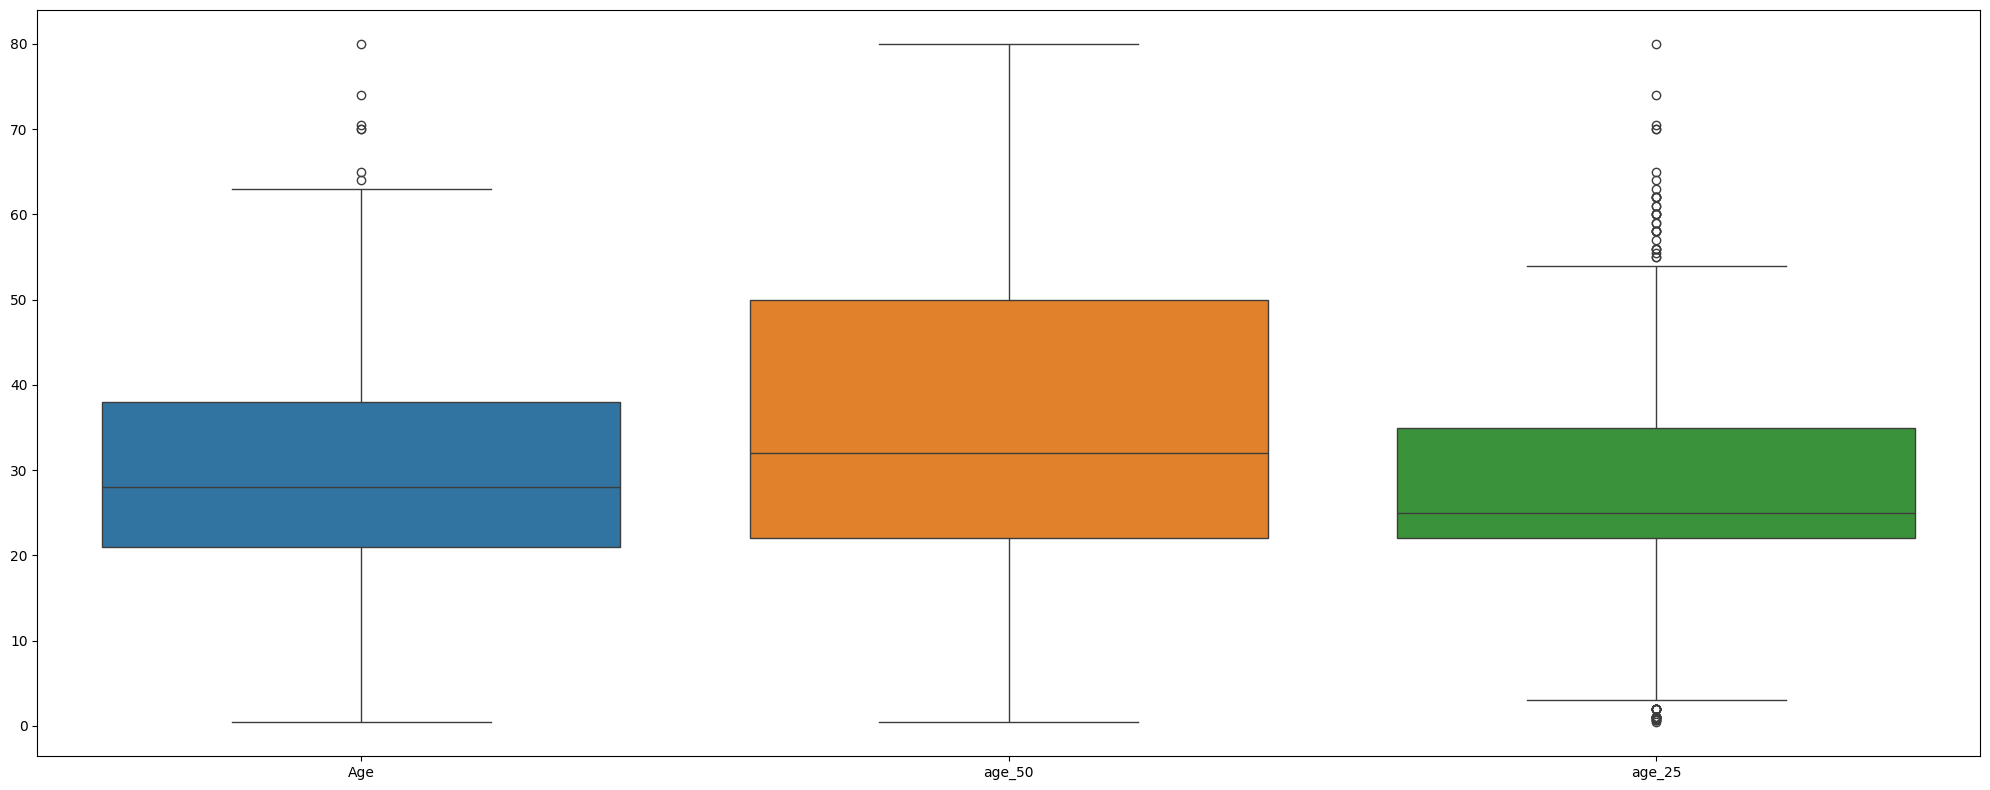

In [208]:
plt.figure(figsize=(20,8))

sns.boxplot(x_train[['Age', 'age_50', 'age_25']])

plt.tight_layout()
plt.show()

## **Using Sklearn**

In [209]:
df.isna().sum()

Age         177
Fare          0
family        0
Survived      0
dtype: int64

In [210]:
df['age_50_new'] = df['Age']
df['age_25_new'] = df['Age']

x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

imputer_50 = SimpleImputer(strategy='constant', fill_value=50)
imputer_25 = SimpleImputer(strategy='constant', fill_value=25)

trf = ColumnTransformer([
    ('a1', imputer_50, ['age_50_new']),
    ('a2', imputer_25, ['age_25_new']),
], remainder='passthrough')


x_train_trf = pd.DataFrame(trf.fit_transform(x_train), columns=x.columns)
x_train_trf.sample(5)

,Age,Fare,family,age_50_new,age_25_new
2,32.0,32.0,32.0,7.925,0.0
313,31.0,31.0,31.0,7.925,0.0
108,50.0,25.0,NaN,23.450,3.0
426,47.0,47.0,47.0,15.000,0.0
646,50.0,25.0,NaN,8.050,0.0


In [211]:
x_train_trf.isna().sum()

Age             0
Fare            0
family        140
age_50_new      0
age_25_new      0
dtype: int64

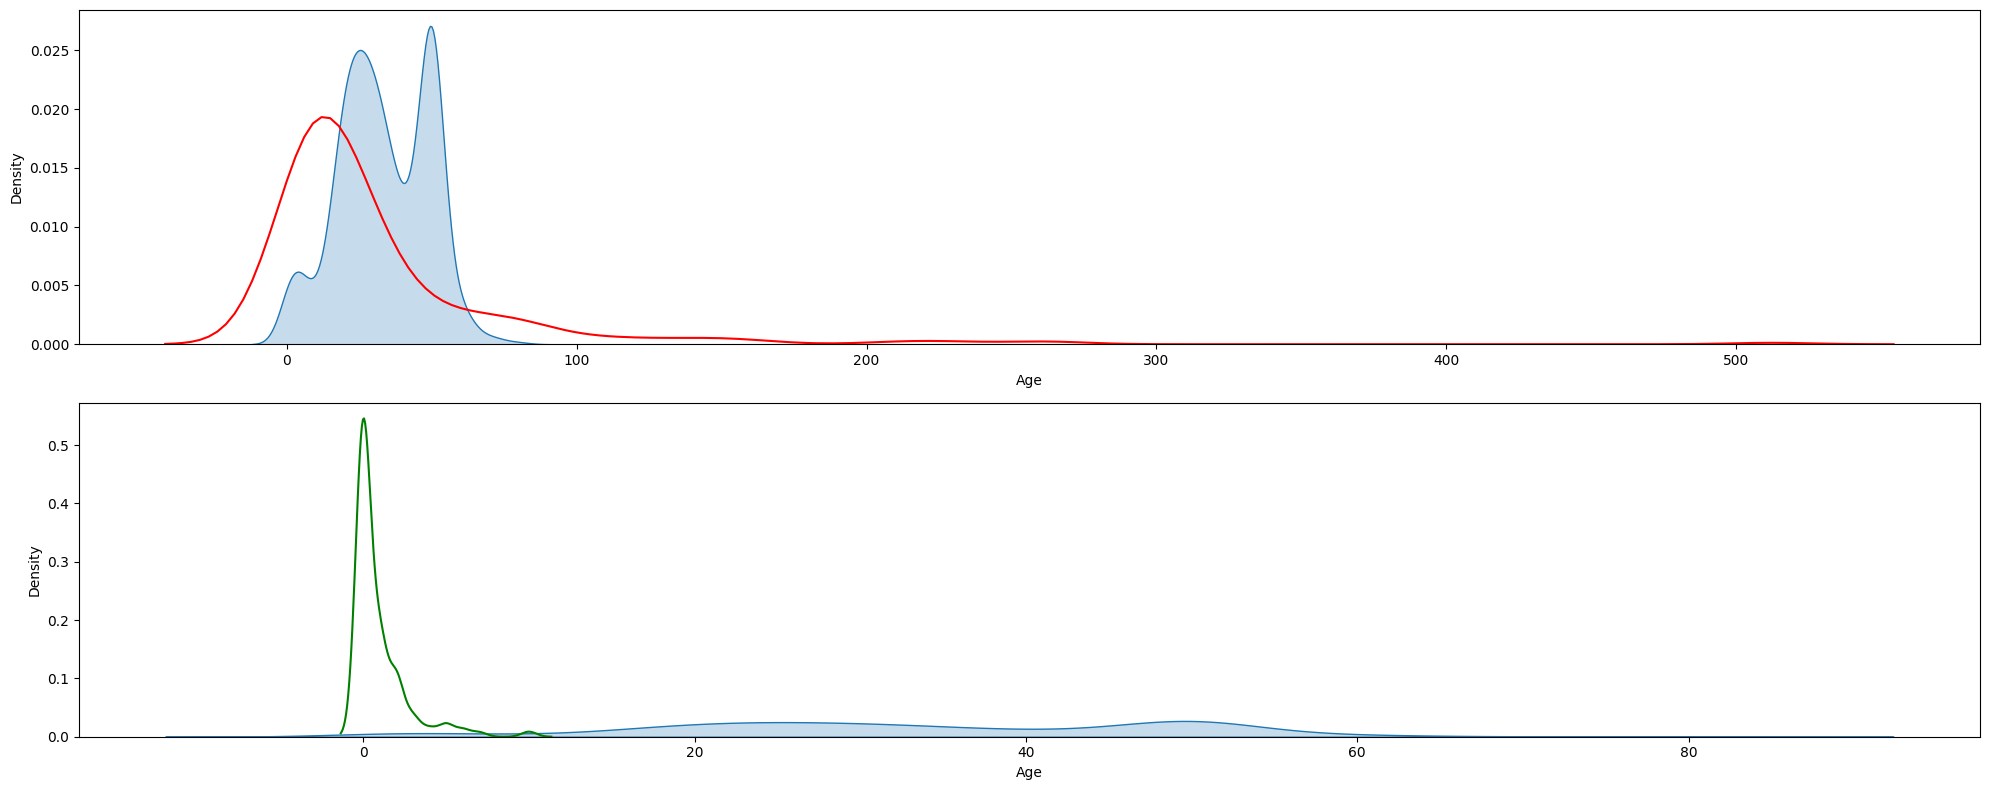

In [212]:
plt.figure(figsize=(20,8))

plt.subplot(211)
sns.kdeplot(x_train_trf['Age'], fill=True)
sns.kdeplot(x_train_trf['age_50_new'], color='r') 

plt.subplot(212) 
sns.kdeplot(x_train_trf['Age'], fill=True)
sns.kdeplot(x_train_trf['age_25_new'], color='g')

plt.tight_layout()
plt.show()


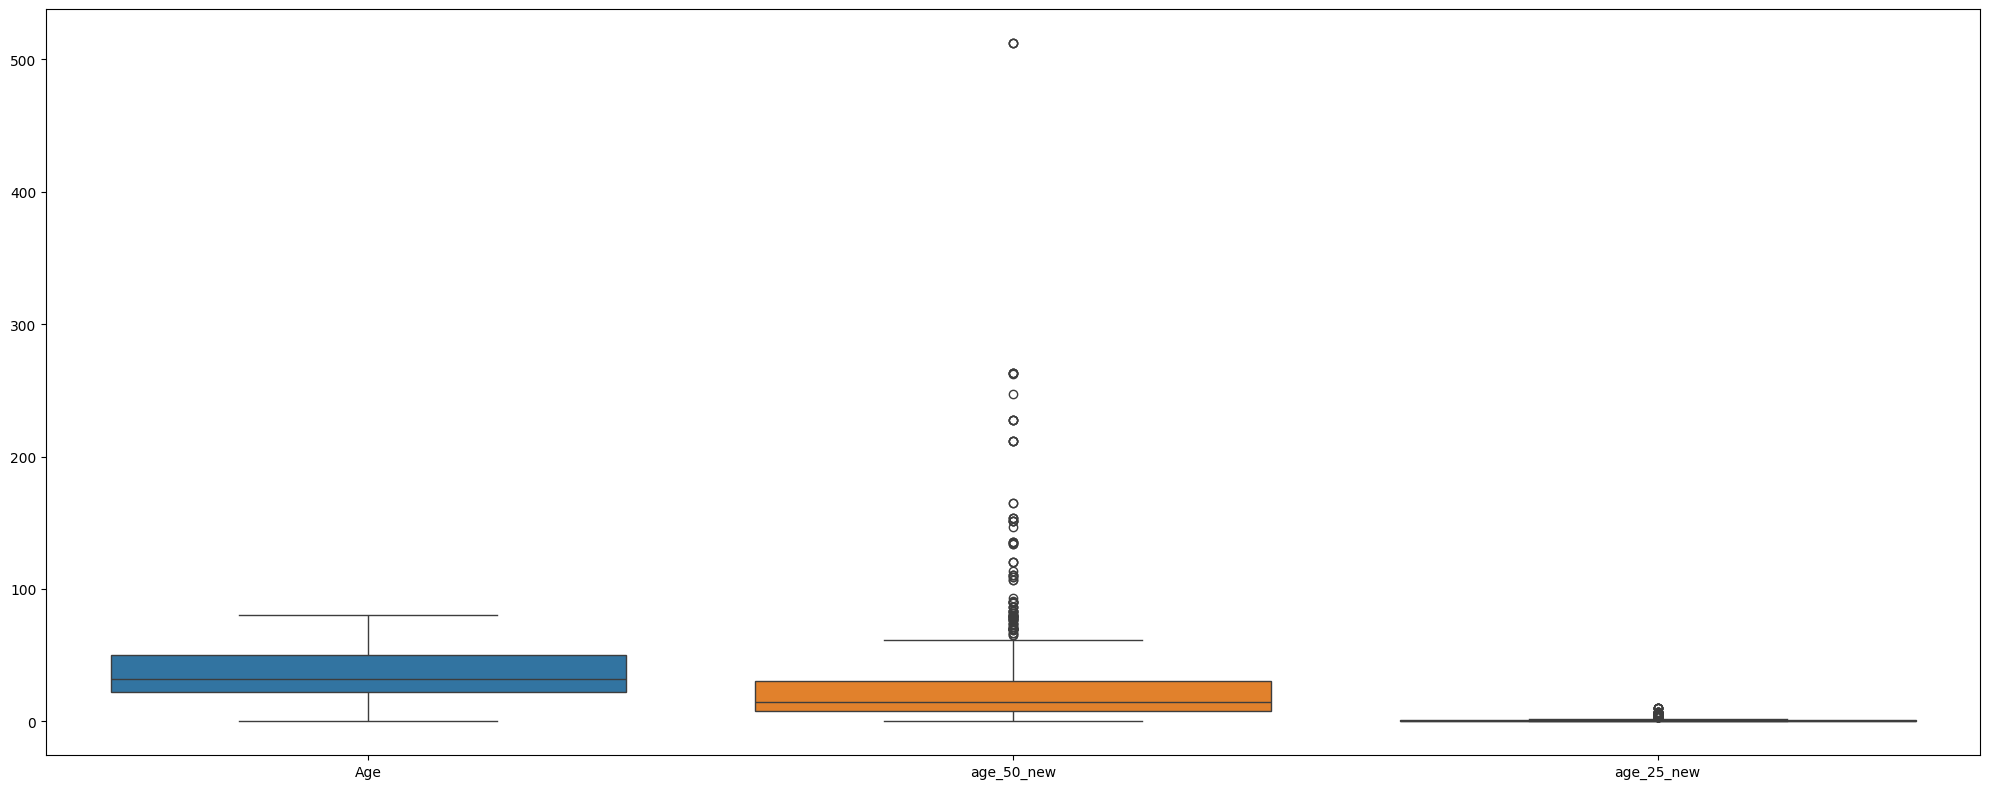

In [213]:
plt.figure(figsize=(20,8))

sns.boxplot(x_train_trf[['Age', 'age_50_new', 'age_25_new']])  

plt.tight_layout()
plt.show()